# Linear Least Squares analysis with Seaborn

For this example we will need the data from our previous analysis. We will focus on just one station (Code:17015010).


Suggested documentation:

Intro to pandas (Software Carpentry): http://swcarpentry.github.io/python-intermediate-mosquitoes/01-intro-python.html

Confidence bands + ANOVA video: https://www.youtube.com/watch?v=sY8CVMGUD54

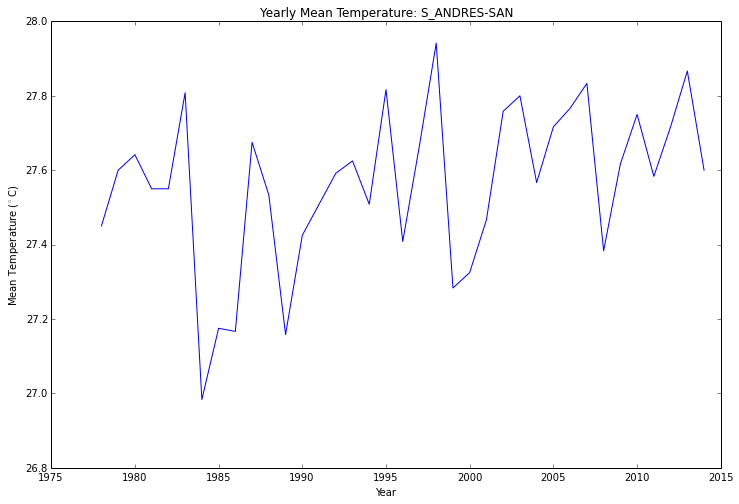

In [2]:
#plotav.py
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
#import sys; a=sys.argv[1]
a=17015010
mpl.rcParams['figure.figsize'] = 12, 8
s='estaciones/%s.txt' % a
df = pd.read_csv(s, index_col=False,names='xabcdefghijkl')
df=df.convert_objects(convert_numeric=True)
s1='estaciones/%sf.txt' % a
df1 = pd.read_csv(s1)
syr=float(df1.columns[0])
w=df.mean(axis=1)
plt.plot(np.arange(syr,len(w)+syr),w)
plt.xlabel('Year')
plt.ylabel('Mean Temperature ($^\circ$C)')
sn='estaciones/%sn.txt' % a
with open (sn, "r") as myfile:
    a=myfile.read().replace('\n', '').replace('LA-','GUAJIRA-').replace('SAN-','S_ANDRES-').replace('NORTE-','N_SANT-').replace('HUIGUAJIRA-','HUILA-')
plt.title("Yearly Mean Temperature: "+a)
#plt.savefig(a+"-historic_yr")
plt.show()

In [3]:
df.head()

,x,a,b,c,d,e,f,g,h,i,j,k,l
0,1978 17015010\t,26.8,26.5,27.3,27.6,28.1,27.6,27.5,27.8,27.8,27.4,27.7,27.3
1,1979 17015010\t,26.6,26.9,27.2,27.4,28.1,27.9,28.5,27.8,28.0,27.9,27.6,27.3
2,1980 17015010\t,27.0,26.6,27.3,27.4,28.3,28.4,28.3,28.3,28.0,27.8,27.4,26.9
3,1981 17015010\t,26.3,27.0,27.4,27.4,28.4,27.4,28.2,28.0,28.0,28.0,27.3,27.2
4,1982 17015010\t,27.3,27.0,26.9,27.4,28.1,28.0,27.8,28.0,27.9,27.4,27.7,27.1


In [4]:
w=df.mean(axis=1)
w.head()

0    27.450000
1    27.600000
2    27.641667
3    27.550000
4    27.550000
dtype: float64

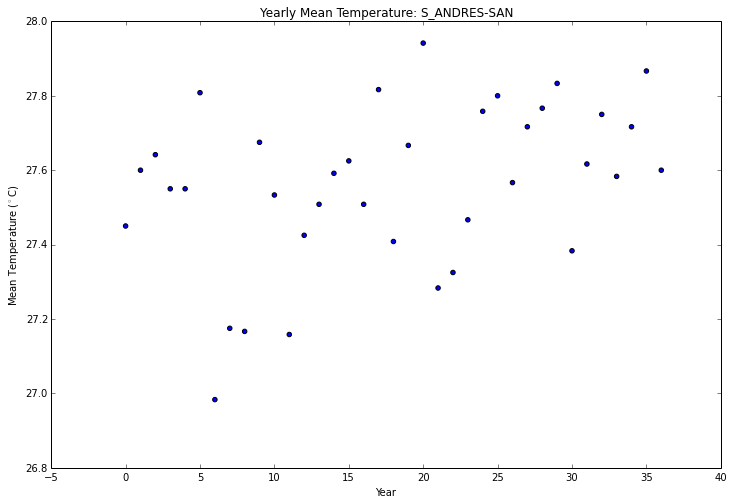

In [5]:
plt.scatter(w.index,w)
plt.xlabel('Year')
plt.ylabel('Mean Temperature ($^\circ$C)')
a=17015010
sn='estaciones/%sn.txt' % a
with open (sn, "r") as myfile:
    a=myfile.read().replace('\n', '').replace('LA-','GUAJIRA-').replace('SAN-','S_ANDRES-').replace('NORTE-','N_SANT-').replace('HUIGUAJIRA-','HUILA-')
plt.title("Yearly Mean Temperature: "+a)

In [6]:
a=np.ones((len(w),2))
a[:,0]=w.index
a

array([[  0.,   1.],
       [  1.,   1.],
       [  2.,   1.],
       [  3.,   1.],
       [  4.,   1.],
       [  5.,   1.],
       [  6.,   1.],
       [  7.,   1.],
       [  8.,   1.],
       [  9.,   1.],
       [ 10.,   1.],
       [ 11.,   1.],
       [ 12.,   1.],
       [ 13.,   1.],
       [ 14.,   1.],
       [ 15.,   1.],
       [ 16.,   1.],
       [ 17.,   1.],
       [ 18.,   1.],
       [ 19.,   1.],
       [ 20.,   1.],
       [ 21.,   1.],
       [ 22.,   1.],
       [ 23.,   1.],
       [ 24.,   1.],
       [ 25.,   1.],
       [ 26.,   1.],
       [ 27.,   1.],
       [ 28.,   1.],
       [ 29.,   1.],
       [ 30.,   1.],
       [ 31.,   1.],
       [ 32.,   1.],
       [ 33.,   1.],
       [ 34.,   1.],
       [ 35.,   1.],
       [ 36.,   1.]])

In [10]:
m,rr,rrr,rrr=np.linalg.lstsq(a,w)
m

array([  7.78409989e-03,   2.74224988e+01])

Let's see which method is faster.

In [8]:
%%timeit
np.dot(np.linalg.inv(np.dot(a.T,a)),np.dot(a.T,w))

The slowest run took 478.58 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 56.6 µs per loop


In [9]:
%%timeit
np.linalg.lstsq(a,w)

The slowest run took 4.43 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 111 µs per loop


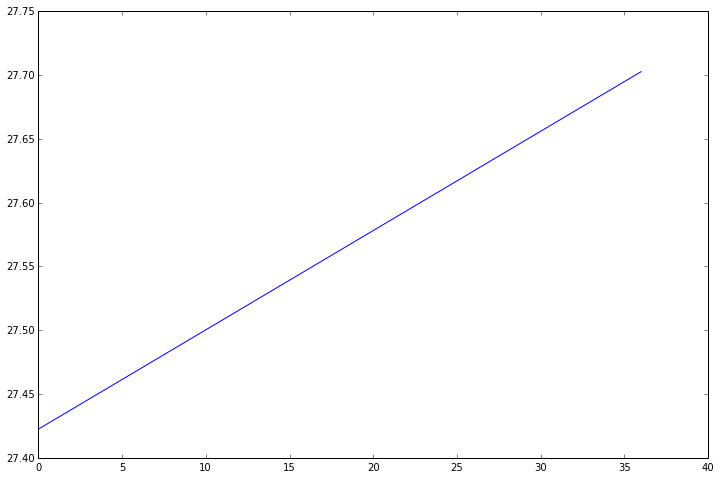

In [11]:
x=np.linspace(0,36,100)
y=m[0]*x+m[1]
plt.plot(x,y)

<Container object of 3 artists>

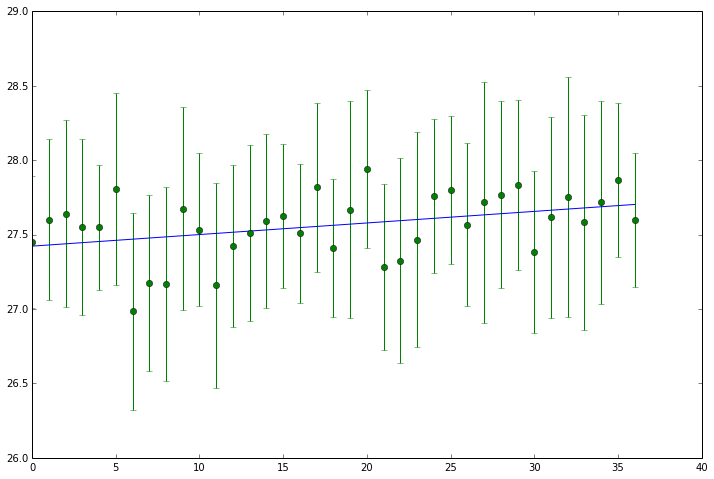

In [12]:
y=m[0]*x+m[1]
plt.plot(x,y)
plt.errorbar(w.index,w,yerr=df.std(axis=1),ecolor='g',fmt = 'o')

In [13]:
import scipy.stats
a, b, r, p, err = scipy.stats.linregress(w.index,w)  
a,b,r

(0.0077840998893630295, 27.422498814604086, 0.3834591229800009)

In [ ]:
scipy.stats.linregress?

Here's an example of building a dataframe using a Python dictionary object. Dictionaries in Python: http://www.tutorialspoint.com/python/python_dictionary.htm

<Container object of 3 artists>

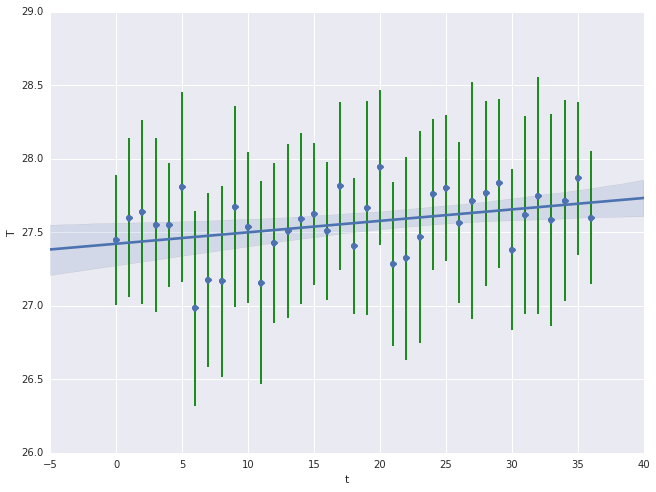

In [16]:
import seaborn as sns
data={'t':w.index, 'T':w}
frame = pd.DataFrame(data, columns=['t', 'T'])
sns.lmplot('t', 'T', frame,ci=95,size=7,aspect=1.33)
plt.errorbar(w.index,w,yerr=df.std(axis=1),ecolor='g',fmt = 'o')

In [17]:
frame.head()

,t,T
0,0,27.450000
1,1,27.600000
2,2,27.641667
3,3,27.550000
4,4,27.550000


Let's look at better correlated data (Temperature vs. Altitude)

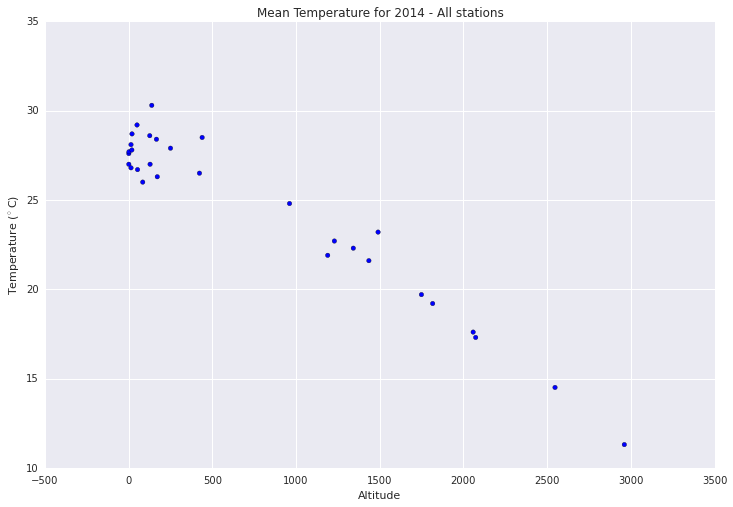

In [24]:
#tvsalt.py
import subprocess
a=2014
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 12,8
df5 = pd.read_csv('estaciones/tvsa%s.txt' % a,index_col=False,names='ab')
plt.scatter(df5.a,df5.b)
plt.xlabel('Altitude')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Mean Temperature for %s - All stations' % a)
plt.show()

-0.00516439519064 28.457256841 -0.966613077845


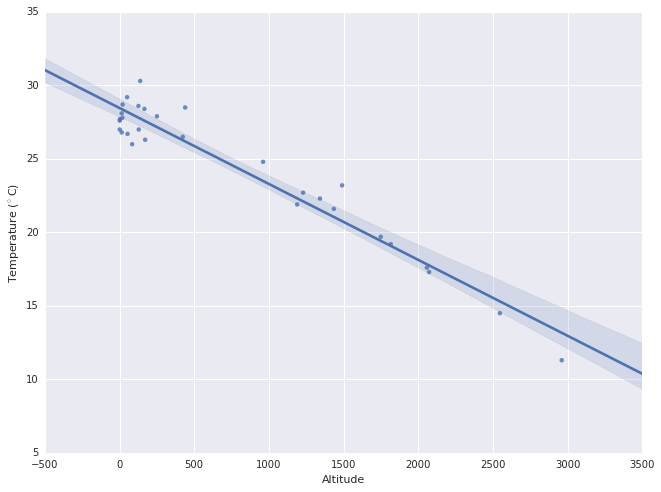

In [26]:
a1, b1, r, p, err = scipy.stats.linregress(df5.a,df5.b)  
print a1,b1,r
sns.lmplot('a', 'b', df5,ci=95,size=7,aspect=1.33)
plt.xlabel('Altitude')
plt.ylabel('Temperature ($^\circ$C)')

Let's look at an obviously uncorrelated set of data (Altitude vs. Humidity)

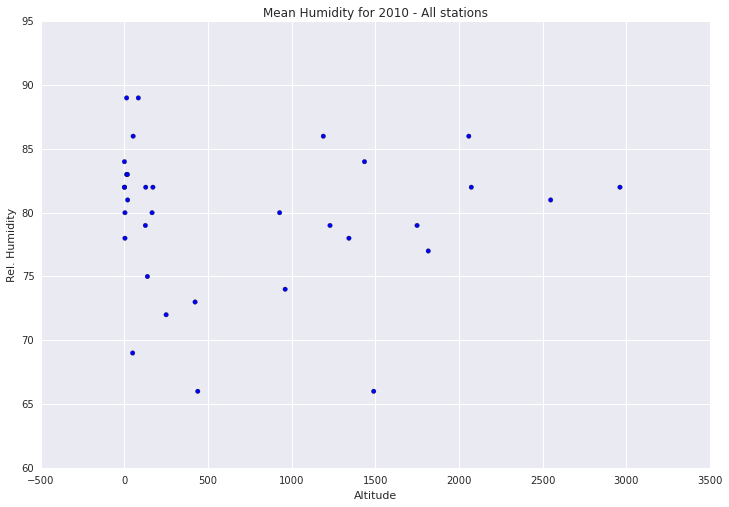

In [22]:
a=2010
df5 = pd.read_csv('estaciones/hvsa%s.txt' % a,index_col=False,names='ab')
plt.scatter(df5.a,df5.b)
plt.xlabel('Altitude')
plt.ylabel('Rel. Humidity')
plt.title('Mean Humidity for %s - All stations' % a)
plt.show()

-0.000308462685545 77.1359636724 -0.0367140507135 0.847263524824


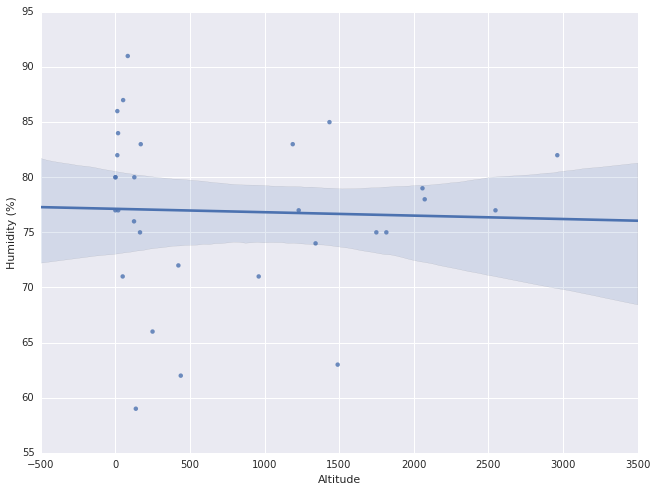

In [43]:
a1, b1, r, p, err = scipy.stats.linregress(df5.a,df5.b)  
print a1,b1,r,p
sns.lmplot('a', 'b', df5,ci=95,size=7,aspect=1.33)
plt.xlabel('Altitude')
plt.ylabel('Humidity (%)')